# Use DESI Legacy Survey photo z



In [2]:
import pandas as pd
from astropy.table import Table, Column, vstack
from astropy.cosmology import Planck15
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii

import urllib.request, json 

import time
import numpy as np
import pyvo as vo
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt

from selenium import webdriver

from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot
from herschelhelp.utils import clean_table

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## 2. Cross match to desi-photoz objects

In [ ]:
field = 'AKARI-SEP'

In [ ]:
#Open small file containing only id ra dec field photo_z photo_zerr
desi_photoz = Table.read('../../dmu0/dmu0_DESI/data/dr8_red.fits')
desi_photoz = desi_photoz[desi_photoz['field'] == field]

In [5]:
desi_photoz.write('./data/{}_DESI-DR8_Zou_et_al_2019_photo_z.fits'.format(field), overwrite=True)

In [6]:
desi_photoz

field
str18
Bootes
COSMOS
EGS
ELAIS-N1
ELAIS-N2
GAMA-09
GAMA-12
GAMA-15
HATLAS-NGP


In [7]:
ml = Table.read('../../dmu1/dmu1_ml_AKARI-SEP/data/master_catalogue_akari-sep_20180221.fits')

In [8]:
ml

help_id,ra,dec
,deg,deg
bytes27,float64,float64
HELP_J164318.825+404445.546,250.828437443607,40.745984910265705
HELP_J164244.476+405313.590,250.685316090607,40.887108455265704
HELP_J164348.377+404930.460,250.951571928607,40.82512769126569
HELP_J162907.731+413754.129,247.282214558607,41.63170241126569
HELP_J162947.447+412132.739,247.447694342607,41.3590941922657
HELP_J162922.794+414147.104,247.34497517760698,41.6964178102657
HELP_J163057.320+415251.919,247.738832915607,41.88108874726569
HELP_J163013.584+414743.101,247.556598389607,41.79530593626569


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


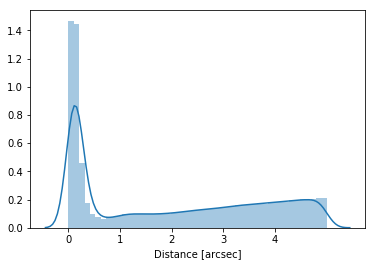

In [9]:
nb_merge_dist_plot(
    SkyCoord(ml['ra'], ml['dec']),
    SkyCoord(desi_photoz['ra'], desi_photoz['dec'])
)

In [10]:
# Given the graph above, we use 0.8 arc-second radius
desi_photoz['ra'].name = 'desi_ra'
desi_photoz['dec'].name = 'desi_dec'
photoz = merge_catalogues(ml, desi_photoz, "desi_ra", "desi_dec", radius=0.8*u.arcsec)

In [12]:
photoz['help_id'].fill_value = ''
photoz['photo_z'].fill_value = np.nan
photoz = photoz.filled()
has_help = photoz['help_id'] != ''
has_z = ~np.isnan(photoz['photo_z'])
photoz[has_help & has_z].write('./data/{}_DESI-DR8_Zou_et_al_2019_photo_z_withhelp_id.fits'.format(field), overwrite=True)

In [13]:
photoz[has_help & has_z]

help_id,ra,dec,flag_merged,id,field,photo_z,photo_zerr
,deg,deg,,,,,
bytes27,float64,float64,bool,str16,str8,float64,float64
HELP_J162707.526+411737.244,246.78135688293202,41.2936790060348,False,6000549224003487,ELAIS-N2,0.5422797,0.028621506
HELP_J163233.863+395528.994,248.141095613607,39.924720597265704,False,6000543752000765,ELAIS-N2,0.5974862,0.06635941
HELP_J163128.893+412942.785,247.870388042607,41.495218039265694,False,6000550310002097,ELAIS-N2,0.51558125,0.13757469
HELP_J162858.621+405542.190,247.244254095607,40.9283860032657,False,6000548138000869,ELAIS-N2,0.2186442,0.06370761
HELP_J163434.937+402548.481,248.645570451607,40.4301337082657,False,6000545956000755,ELAIS-N2,0.14262727,0.009865502
HELP_J162642.817+411630.254,246.678405162932,41.2750706660348,False,6000549224003014,ELAIS-N2,0.21139045,0.019573843
HELP_J162847.734+403023.029,247.198893088607,40.5063968062657,False,6000545951001934,ELAIS-N2,0.21584016,0.052848402
HELP_J162743.711+403257.718,246.932131022932,40.5493660060348,False,6000545951002612,ELAIS-N2,0.19590607,0.019225592
